### Triangular Lattice Markov Chain

The implementaiton of the Metropolis-Hastings algorithm itself is unchanged when compared to the square lattice Ising model. However, beyond the lattice geometry, the triangular Ising Model *differs in coordination, energy scale, critical temperature $T_c$, and spatial statistics that a CNN learns*.

The following is the Magnetization vs Temperature plots for an $N \times N$ Square vs Triangular lattice based on the 2D Ising Model:
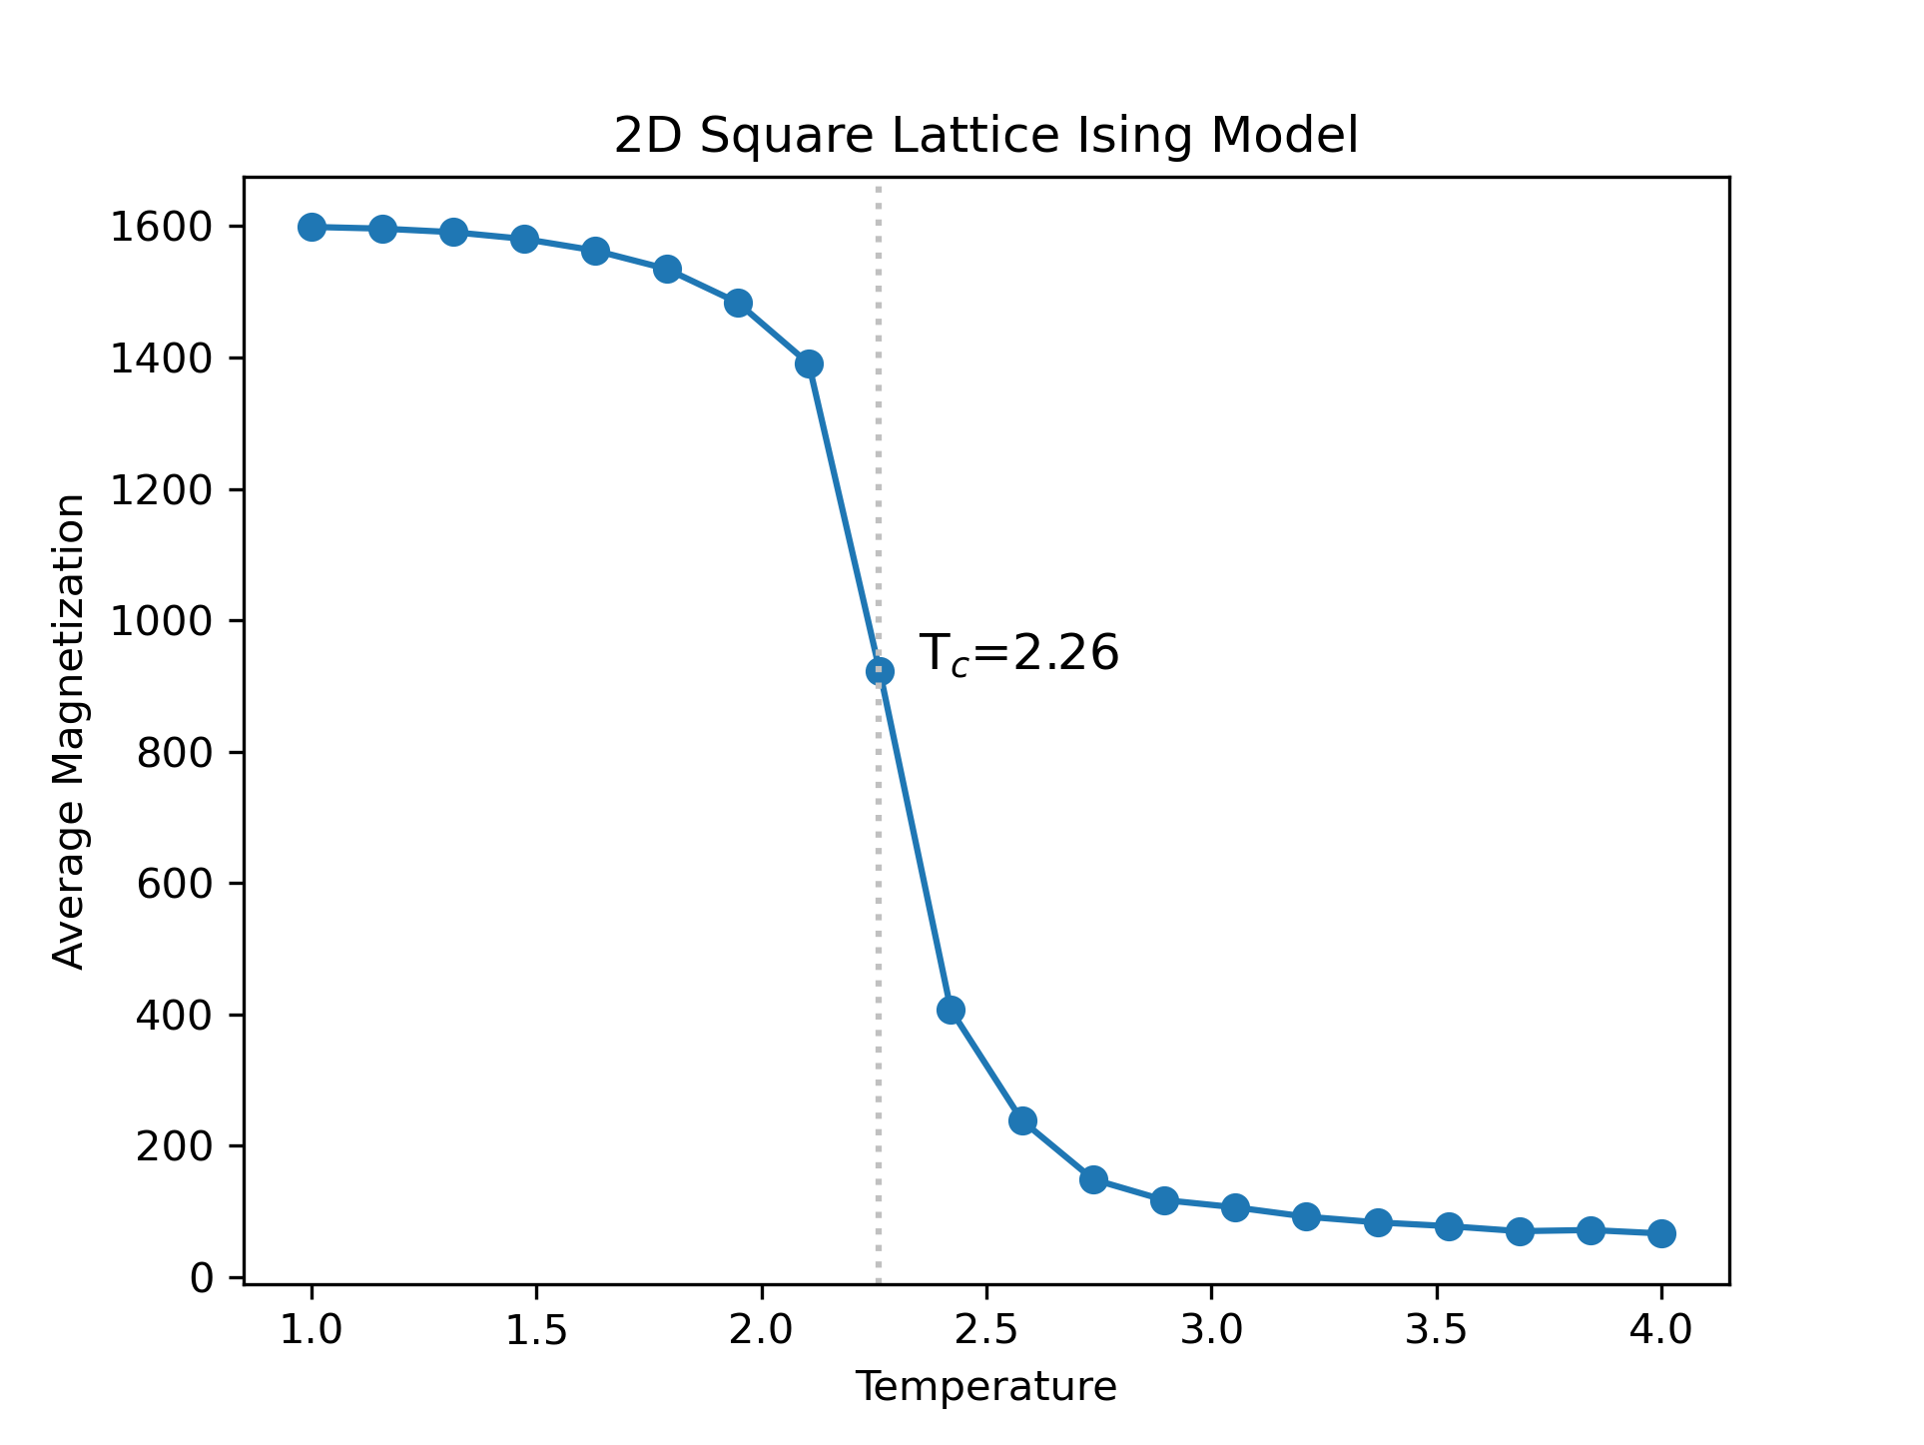
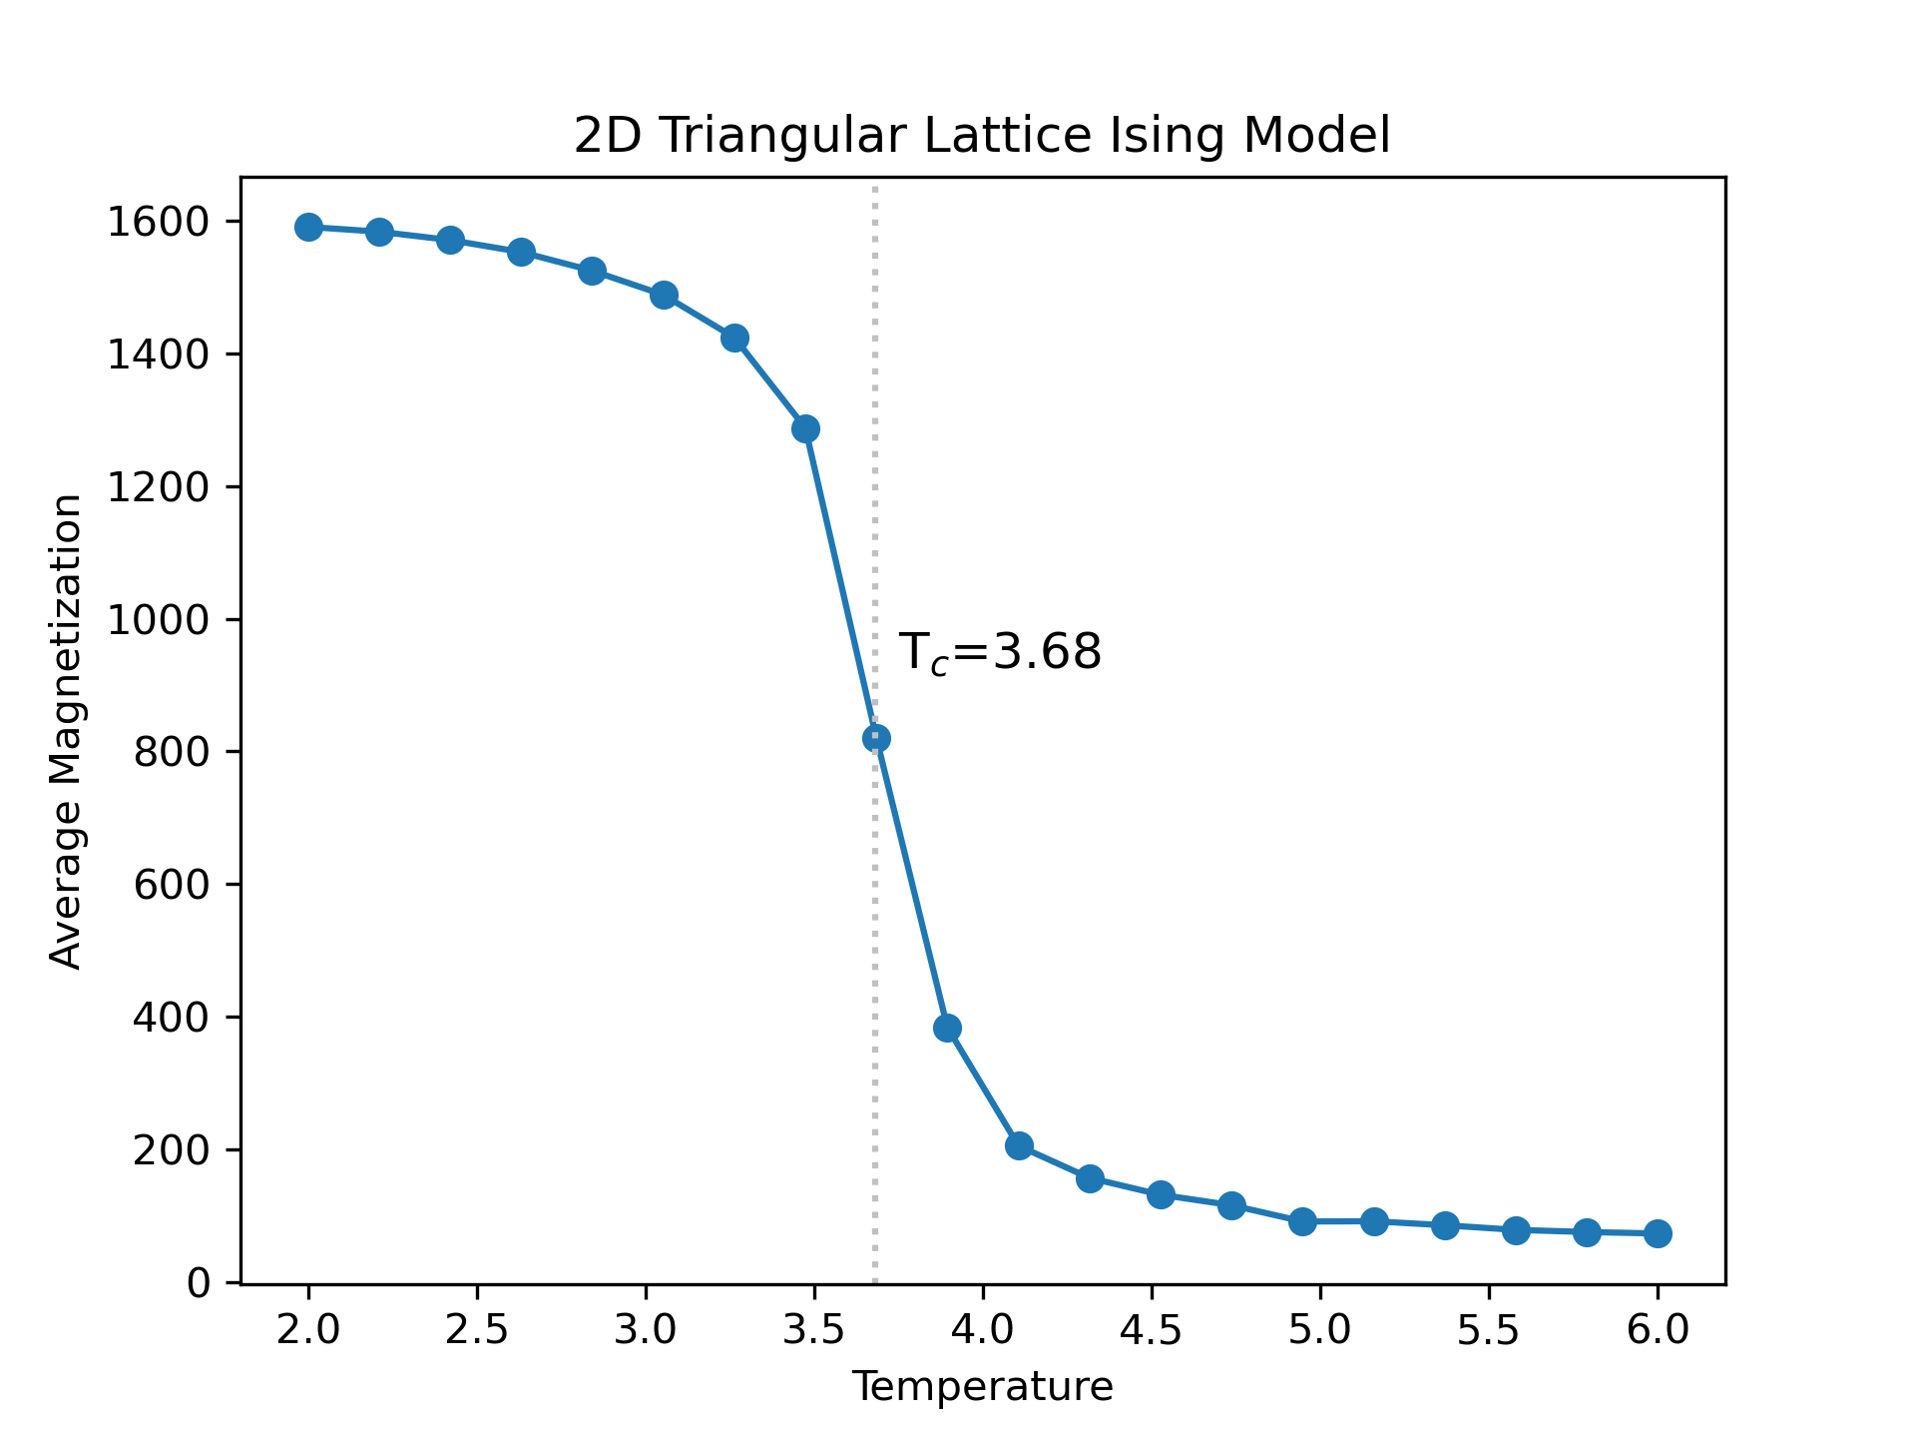


Since the Triangular lattice has more neighbors, it has added complexity in its interaction energy and a greater critical temperature.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

triangular_temps=np.linspace(2, 6, 20)  

# Triangular lattice Ising model functions
def triangular_metropolis_step(config, beta):
    for i in range(N):
        for j in range(N):
            spin = config[i, j]
            neighbors_sum = (
                config[(i+1)%N, j] + config[(i-1)%N, j] +  # Vertical neighbors
                config[i, (j+1)%N] + config[i, (j-1)%N] +  # Horizontal neighbors
                config[(i-1)%N, (j+1)%N] + config[(i+1)%N, (j-1)%N]  # Diagonal neighbors
            )
            delta_energy = 2 * spin * neighbors_sum

            if delta_energy < 0 or np.random.rand() < np.exp(-beta * delta_energy):
                spin *= -1
            config[i, j] = spin
    return config

def calculate_magnetization(config):
    return np.sum(config)

def is_ordered(config, critical_temp):
    return np.abs(np.mean(config)) > 0.25 if critical_temp is None else triangular_Temps <= critical_temp



In [ ]:
N = 40  
steps = 1500  
thermalization_steps = 800  
num_samples_per_temp = 500  
critical_temp =3.68

# Generating configurations and estimating critical temperature
data_dtype = [('phase', np.bool_), ('temperature', np.float64), ('sample_index', np.int32), ('config', np.int8, (N, N))]
ordered_data = []
disordered_data = []
avg_magnetization = []

for temp_index, temp in enumerate(triangular_temps):
    temp_ordered_data = []
    temp_disordered_data = []
    
    config = np.random.choice([1, -1], size=(N, N))

    # Thermalization
    for _ in range(thermalization_steps):
        config = triangular_metropolis_step(config, 1 / temp)
    
    magnetizations = []

    for sample_index in range(steps):
        config = triangular_metropolis_step(config, 1 / temp)
        magnetizations.append(calculate_magnetization(config))
        
        if temp <= critical_temp:
        # if is_ordered(config, None):
             temp_ordered_data.append((True, temp, sample_index, config.copy()))
        else:
             temp_disordered_data.append((False, temp, sample_index, config.copy()))
    
    avg_magnetization.append(np.mean(np.abs(magnetizations)))

    #print(temp,np.abs(np.mean(config)))
    ordered_data.extend(temp_ordered_data)
    disordered_data.extend(temp_disordered_data)

ordered_arr = np.array(ordered_data, dtype=data_dtype)
disordered_arr = np.array(disordered_data, dtype=data_dtype)

In [ ]:
# Plotting magnetization vs temperature
plt.plot(triangular_temps, avg_magnetization, 'o-')
plt.xlabel('Temperature')
plt.ylabel('Average Magnetization')
plt.title('2D Triangular Lattice Ising Model')
plt.text(3.75, 925, 'T$_{c}$=3.68', fontsize=12)
plt.axvline(x=3.68, color ='silver', linestyle=":")
plt.savefig("Tri_Lat.png", dpi=300)
plt.show()

# Finding critical temperature (where magnetization exhibits discontinuity)
critical_temp = triangular_temps[np.argmin(np.gradient(avg_magnetization))]
print(f"Estimated Critical Temperature: {critical_temp}")

for i, temp in enumerate(triangular_temps):
    phase = "Ordered" if is_ordered(config, critical_temp) else "Disordered"
    print(f"At Temperature {temp}: {phase} Phase")
#np.save('tri_ordered_configs.npy', ordered_arr)
#np.save('tri_disordered_configs.npy', disordered_arr) 
#print(disordered_arr)